In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn as sk
import math

In [116]:
def split_data(x, y, ratio):
    i1 = len(x)
    i2 = len(y)
    x_test, y_test, x_train, y_train = [], [], [], []
    if i1 != i2:
        raise Exception("Incorrect dimensions")
    for _ in range(i1):
        if random.random() > ratio:
            x_test.append(x[_])
            y_test.append(y[_])
        else:
            x_train.append(x[_])
            y_train.append(y[_])
            
    return x_train, y_train, x_test, y_test

"""
Logistic regression function
"""
def p(x, b0, b1):
    return math.exp(b0 + b1 * x) / (1 + math.exp(b0 + b1 * x))

def logistic_gradient_descent(x, y, alfa=0.03, stop=10, debug=False, iter_limit=5000):
    """
    input:
    x, y - data features
    
    output:
    b1, b0 - predicted parameters of data
    """
        
    """
    Logistic regression cost function
    """
    def L(x, y, b0, b1):
        val = p(x, b0, b1)
        return -y * math.log(val) - (1 - y) * math.log(1 - val)
        
    def cost_function(x, y, b0, b1, n):
        error = 0
        for _ in range(n):
            error += L(x[_], y[_], b0, b1)
        return error / n
    
    def derived_vals(x, y, b0, b1, n):
        derive_b0 = 0
        derive_b1 = 0
        for _ in range(n):
            val = p(x[_], b0, b1) - y[_]
            derive_b0 += val
            derive_b1 += x[_] * val
        derive_b0 /= n
        derive_b1 /= n
        
        return derive_b0, derive_b1
    
    x_vals, y_vals = [], []
    print("#"*10)
    print("Gradient descent starts execution")
    N = len(x)
    b0, b1, b1_best, b0_best = 0, 0, 0, 0
    error_new = cost_function(x, y, b0, b1, N)
    error_min = error_new
    error_old = 0
    iteration = 0
    while (math.fabs(error_new) > stop and iteration < iter_limit):
        derived_b0, derived_b1 = derived_vals(x, y, b0, b1, N)
        if error_new - error_old > 10000:
            raise Exception('Wrong param alfa')
        b1 -= alfa * derived_b1
        b0 -= alfa * derived_b0
        error_old = error_new
        error_new = cost_function(x, y, b0, b1, N)
        if error_min > error_new:
            error_min = error_new
            b1_best = b1
            b0_best = b0
        if iteration % 1000 == 0:
#             alfa *= 0.95
            if debug:
                print("iteration {}, old MSE = {}, new MSE = {} :: b0 = {} , b1 = {}".format(iteration, error_old, error_new, b0, b1))
        iteration += 1    
    print("End of gradient descent execution")
    print("#"*10)
    return b1_best, b0_best


In [105]:
iris = pd.read_csv('datasets/iris.csv')

# Preprocess dataframe
one_feature = iris[['sepal_width', 'species']]
of = one_feature.loc[one_feature['species'] != 'virginica']
features = of[['sepal_width']]

# Transform to numeric
features = features[['sepal_width']].apply(pd.to_numeric)
target = of[['species']]

# Class 1 and 0
target = target.replace('setosa', 1)
target = target.replace('versicolor', 0)

# Transform to numeric
target = target[['species']].apply(pd.to_numeric)

## Shuffle
X, Y = sk.utils.shuffle(features.values, target.values, random_state=0)

## Split 
x_train, y_train, x_test, y_test = split_data(X, Y, ratio=0.8)

In [117]:
gd_b0, gd_b1 = logistic_gradient_descent(x_train, y_train, alfa=1.4, stop=1e-5, debug=True, iter_limit=100000)

##########
Gradient descent starts execution
iteration 0, old MSE = [0.69314718], new MSE = [0.70848965] :: b0 = [-0.00823529] , b1 = [0.18611765]
iteration 1000, old MSE = [0.40866304], new MSE = [0.40871373] :: b0 = [-17.03457552] , b1 = [5.6147403]
iteration 2000, old MSE = [0.40497579], new MSE = [0.40497573] :: b0 = [-17.54335717] , b1 = [5.70517483]
iteration 3000, old MSE = [0.40494585], new MSE = [0.40494584] :: b0 = [-17.73166785] , b1 = [5.76616086]
iteration 4000, old MSE = [0.40494097], new MSE = [0.40494096] :: b0 = [-17.80781177] , b1 = [5.79082155]
iteration 5000, old MSE = [0.40494015], new MSE = [0.40494015] :: b0 = [-17.83888236] , b1 = [5.80088449]
iteration 6000, old MSE = [0.40494002], new MSE = [0.40494002] :: b0 = [-17.85160731] , b1 = [5.80500579]
iteration 7000, old MSE = [0.40493999], new MSE = [0.40493999] :: b0 = [-17.8568266] , b1 = [5.8066962]
iteration 8000, old MSE = [0.40493999], new MSE = [0.40493999] :: b0 = [-17.85896867] , b1 = [5.80738996]
iteratio

iteration 77000, old MSE = [0.40493999], new MSE = [0.40493999] :: b0 = [-17.86046053] , b1 = [5.80787314]
iteration 78000, old MSE = [0.40493999], new MSE = [0.40493999] :: b0 = [-17.86046053] , b1 = [5.80787314]
iteration 79000, old MSE = [0.40493999], new MSE = [0.40493999] :: b0 = [-17.86046053] , b1 = [5.80787314]
iteration 80000, old MSE = [0.40493999], new MSE = [0.40493999] :: b0 = [-17.86046053] , b1 = [5.80787314]
iteration 81000, old MSE = [0.40493999], new MSE = [0.40493999] :: b0 = [-17.86046053] , b1 = [5.80787314]
iteration 82000, old MSE = [0.40493999], new MSE = [0.40493999] :: b0 = [-17.86046053] , b1 = [5.80787314]
iteration 83000, old MSE = [0.40493999], new MSE = [0.40493999] :: b0 = [-17.86046053] , b1 = [5.80787314]
iteration 84000, old MSE = [0.40493999], new MSE = [0.40493999] :: b0 = [-17.86046053] , b1 = [5.80787314]
iteration 85000, old MSE = [0.40493999], new MSE = [0.40493999] :: b0 = [-17.86046053] , b1 = [5.80787314]
iteration 86000, old MSE = [0.4049399

In [109]:
def animate(data_x, data_y, GD):
    plt.scatter(data_x, data_y)
    gd_b1, gd_b0 = GD[0], GD[1]
    plt.plot(sorted(data_x),
             [p(_, gd_b0, gd_b1) for _ in sorted(data_x)],
             c="b", linewidth=2, label='Logistic Gradient descent')
    plt.legend()
    plt.show()

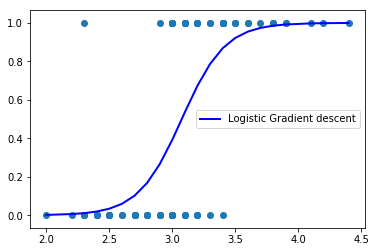

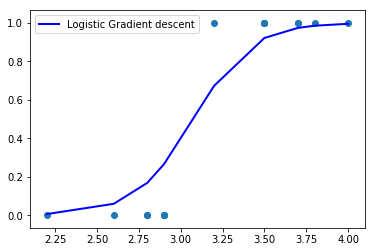

In [110]:
animate(x_train, y_train, (gd_b0, gd_b1))
animate(x_test, y_test, (gd_b0, gd_b1))

In [111]:
def predict(x, b0, b1, threshold):
    predicted = []
    for _ in x:
        value = p(_, b0, b1)
        print(value)
        predicted.append(value > threshold)
    return predicted

In [112]:
from sklearn.metrics import accuracy_score

In [114]:
y_predicted = predict(x_train, gd_b0, gd_b1, 0.3)
accuracy = accuracy_score(y_train, y_predicted)
print(accuracy)

1.4228963883093807e-24
3.0187674975875797e-22
5.0614801261242114e-23
1.8004530250856388e-21
4.833332816224282e-16
1.8854396233384146e-28
6.404512148153507e-20
6.404512148153507e-20
1.8004530250856388e-21
4.833332816224282e-16
2.278191948601093e-18
1.8004530250856388e-21
1.4228963883093807e-24
3.0187674975875797e-22
4.000083140530276e-26
1.4228963883093807e-24
8.8870217152117e-31
1.0738260227495246e-20
2.3857292079357653e-25
3.0187674975875797e-22
6.404512148153507e-20
1.8004530250856388e-21
1.4228963883093807e-24
3.8197785290041494e-19
6.404512148153507e-20
1.0254230828413176e-13
8.10390929802087e-17
2.278191948601093e-18
2.8826959006186764e-15
5.0614801261242114e-23
2.3857292079357653e-25
1.1245137216326862e-27
8.48643729191579e-24
1.0738260227495246e-20
1.8004530250856388e-21
1.8004530250856388e-21
5.0614801261242114e-23
4.833332816224282e-16
4.000083140530276e-26
2.4983425374199585e-32
2.3857292079357653e-25
1.8004530250856388e-21
1.8854396233384146e-28
1.8004530250856388e-21
3.8197

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [104]:
iris = load_iris()
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

1.0
